In [10]:
import pandas as pd
import numpy as np
import matplotlib.gridspec
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from adjustText import adjust_text

In [11]:
#Load in all genes from the analysis
taiji_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/final_genes_all_sets_ALLGENES.csv')
taiji_genes_set = set(taiji_genes['Genes'])

In [12]:
#Load in the LogFC RNA seq:
#Load in Taiji results from all ranks. 
atac_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/Taiji/ATAC_RNA/output_atac/GeneRanks.tsv', sep='\t').rename(columns={'Unnamed: 0':"Genes", "Early_Pre_TFH":'Early Extra-GC', 'Late_Pre_TFH': 'Late Extra-GC'}).set_index("Genes")
H3K4me1_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/Taiji/CUTnRUN_H3K4me1_RNA/output_cutnrun/GeneRanks.tsv', sep='\t').rename(columns={'Unnamed: 0':"Genes", 'CXCR5pos_PD1neg': 'Early Extra-GC', 'CXCR5pos_PD1int': 'Late Extra-GC', 'CXCR5hi_PD1hi': 'GC'}).set_index("Genes")
H3K4me3_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/Taiji/CUTnRUN_H3K4me3_RNA/output_cutnrun/GeneRanks.tsv', sep='\t').rename(columns={'Unnamed: 0':"Genes", 'CXCR5pos_PD1neg': 'Early Extra-GC', 'CXCR5pos_PD1int': 'Late Extra-GC', 'CXCR5hi_PD1hi': 'GC'}).set_index("Genes")
H3K27Ac_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/Taiji/CUTnRUN_H3K27Ac_RNA/output_cutnrun/GeneRanks.tsv', sep='\t').rename(columns={'Unnamed: 0':"Genes", 'CXCR5pos_PD1neg': 'Early Extra-GC', 'CXCR5pos_PD1int': 'Late Extra-GC', 'CXCR5hi_PD1hi': 'GC'}).set_index("Genes")

# Concatenate and compute mean across available values
average_df = pd.concat([atac_genes, H3K4me1_genes, H3K4me3_genes, H3K27Ac_genes]).groupby(level=0).mean()
average_df = average_df.reset_index()
average_df = average_df[["Genes", "Naive", "Early Extra-GC", "Late Extra-GC", "GC"]]

logfc_df = pd.read_csv('/ix3/djishnu/Alisa/Tfh/correct_direction_sign_change_rna_earlyvsGC_Thresh_log2FC.csv')
merged_df = average_df.merge(logfc_df, on='Genes', how='left')


In [13]:
#Calculate Taiji Rank Importance
merged_df['Importance'] = np.log2(merged_df['GC'] / merged_df['Early Extra-GC'])
merged_df = merged_df.set_index("Genes")

{'NR2F6', 'ZNF460', 'SP1', 'NFATC1', 'RORA', 'ZNF274', 'ZNF384', 'FOSB', 'RREB1', 'ATF4', 'ZSCAN30', 'MEF2C', 'E2F4', 'SATB1', 'KLF9', 'ZNF467', 'DNMT1', 'POU2F1', 'TCF12', 'ZBTB17', 'ZNF121', 'ZNF519', 'IRF2', 'ZNF891', 'SP4', 'ZNF281', 'ZEB1', 'ZNF143', 'ZNF76', 'ATF6B', 'ZBTB33', 'RUNX1', 'ZNF571', 'FOXO3', 'ZNF484', 'GATA3', 'FOXO1', 'HSF1', 'NFATC2', 'SP2', 'NR4A2', 'ELK3', 'KLF6', 'FOXK1', 'ZNF333', 'NR3C1', 'ZNF331', 'NFAT5', 'KLF13', 'ZNF394', 'ZNF100', 'HIF1A', 'ZFX', 'ZNF354A', 'FOXN3', 'YY1', 'ZNF22', 'GTF2B', 'IRF3', 'NFYA', 'THAP11', 'ZFP82', 'IRF8', 'FOXJ2', 'IRF1', 'FOSL2', 'MEF2A', 'KLF4', 'LEF1', 'ETS1', 'SPIB', 'ELF1', 'VEZF1', 'NFYB', 'BCL11A', 'NFYC', 'ZNF548', 'IRF7', 'RFX5', 'SOX4', 'KLF7', 'TCF7', 'NR4A1', 'ZNF713', 'STAT6', 'ZSCAN22', 'POU2F2', 'GABPA', 'IRF4', 'ZNF354C', 'MAF', 'MEF2D', 'BCL6', 'GTF2I', 'EGR2', 'IKZF3', 'ZNF776', 'ZNF783', 'IRF9', 'ZNF322', 'CREM', 'SREBF2', 'STAT3', 'ZNF543', 'PRDM1', 'ZNF182', 'NRF1', 'KLF2', 'FOS', 'ZNF180', 'ELK4', 'KLF12',

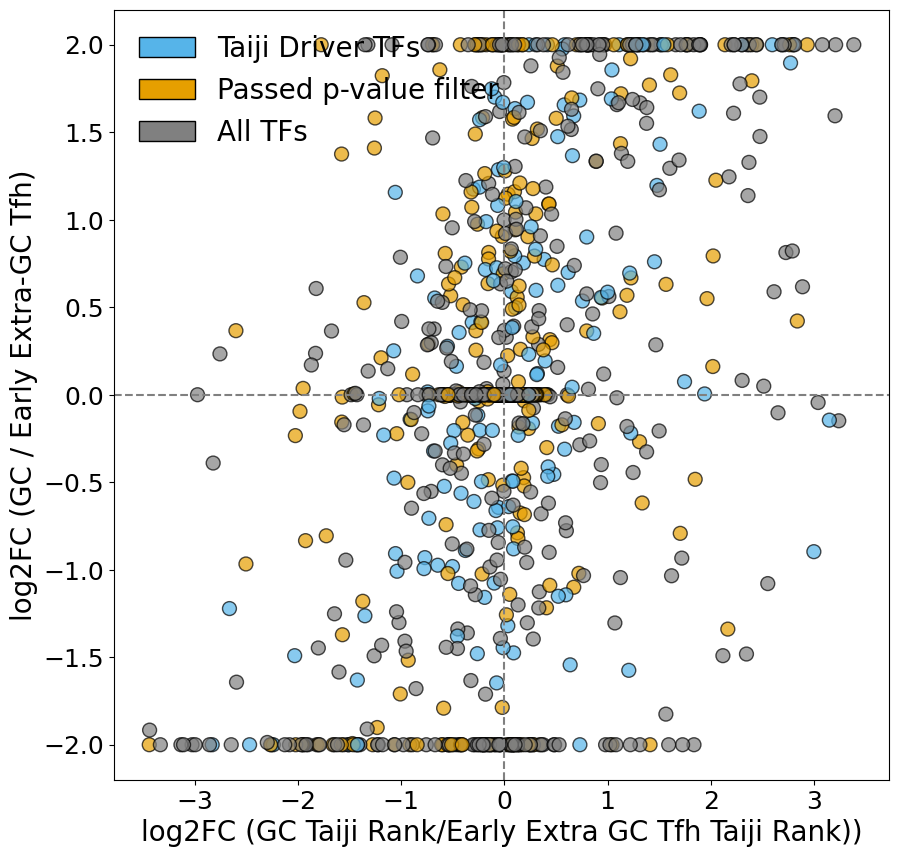

In [17]:
# Load the gene list for highlighting (e.g., 'target genes')

taiji_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/final_genes_all_sets_ALLGENES.csv')
taiji_genes_set = set(taiji_genes['Genes'])

# Load the p-value filtered list (e.g., significant genes only)
pval_filtered_df = pd.read_csv("/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/final_genes_all_sets_152.csv")  # One column: 'Gene'
significant_genes = set(pval_filtered_df['Genes'])
print(significant_genes)



# Categorize genes
def assign_color(gene):
    if gene in significant_genes:
        return '#56B4E9'            # In the highlight list
           # Failed p-value filter
    if gene in taiji_genes_set:
        return "#E69F00"
    else:
        return 'grey'       # Other

# Assume merged_df index is gene names
merged_df['Color'] = merged_df.index.map(assign_color)

# Plot
fig = plt.figure(figsize=(10, 10))

sc = plt.scatter(
    merged_df['Importance'],
    merged_df['LogChange_Thresh'],
    c=merged_df['Color'],
    edgecolor='k',
    alpha=0.7,
    s=100
)

plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.ylabel('log2FC (GC / Early Extra-GC Tfh)', fontsize=20)
plt.xlabel('log2FC (GC Taiji Rank/Early Extra GC Tfh Taiji Rank))', fontsize=20)

plt.tick_params(axis='both', labelsize=18)

# Optional legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#56B4E9', edgecolor='k', label='Taiji Driver TFs'),
    Patch(facecolor='#E69F00', edgecolor='k', label='Passed p-value filter'),
    Patch(facecolor='gray', edgecolor='k', label='All TFs')
]
plt.legend(handles=legend_elements, fontsize=20, frameon=False)

In [16]:
# Save as PNG
# fig.savefig("/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/GC_vs_Early_ImportancePlot_allTFs_correcteddirection_logthresh_difTaijiRank.png", dpi=300, bbox_inches='tight')

# Save as PDF
# fig.savefig("/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/GC_vs_Early_ImportancePlot_allTFs_correcteddirection_logthresh_difTaijiRank.png.pdf", bbox_inches='tight')


In [19]:
merged_df

,Naive,Early Extra-GC,Late Extra-GC,GC,Unnamed: 0,LogChange,LogChange_Thresh,Importance,Color
Genes,,,,,,,,,
AC023509.3,0.000017,0.000023,0.000015,0.000019,NaN,NaN,NaN,-0.234040,grey
AC138696.1,0.000017,0.000022,0.000015,0.000016,NaN,NaN,NaN,-0.403180,grey
AHR,0.000177,0.001072,0.000731,0.000515,3325.0,1.156287,1.156287,-1.057491,#56B4E9
AIRE,0.000043,0.000048,0.000044,0.000050,10461.0,0.000000,0.000000,0.060723,grey
ALX1,0.000066,0.000073,0.000058,0.000071,14860.0,0.000000,0.000000,-0.039232,grey
...,...,...,...,...,...,...,...,...,...
ZSCAN4,0.000093,0.000111,0.000113,0.000104,14898.0,0.000000,0.000000,-0.096954,#E69F00
ZSCAN5,0.000026,0.000052,0.000029,0.000025,NaN,NaN,NaN,-1.044985,grey
ZSCAN5C,0.000024,0.000029,0.000022,0.000021,NaN,NaN,NaN,-0.460651,grey


In [22]:
merged_df.dropna(subset=['LogChange'])

,Naive,Early Extra-GC,Late Extra-GC,GC,Unnamed: 0,LogChange,LogChange_Thresh,Importance,Color
Genes,,,,,,,,,
AHR,0.000177,0.001072,0.000731,0.000515,3325.0,1.156287,1.156287,-1.057491,#56B4E9
AIRE,0.000043,0.000048,0.000044,0.000050,10461.0,0.000000,0.000000,0.060723,grey
ALX1,0.000066,0.000073,0.000058,0.000071,14860.0,0.000000,0.000000,-0.039232,grey
ALX3,0.000072,0.000202,0.000078,0.000084,9953.0,-17.013901,-2.000000,-1.276211,#E69F00
ALX4,0.000057,0.000071,0.000061,0.000067,704.0,-20.695375,-2.000000,-0.082992,grey
...,...,...,...,...,...,...,...,...,...
ZSCAN30,0.001622,0.001739,0.000526,0.001880,16359.0,1.103992,1.103992,0.112280,#56B4E9
ZSCAN31,0.000114,0.000183,0.000124,0.000138,33506.0,-19.189516,-2.000000,-0.408116,#E69F00
ZSCAN4,0.000093,0.000111,0.000113,0.000104,14898.0,0.000000,0.000000,-0.096954,#E69F00
